In [1]:
import opendatasets as od
import matplotlib.pyplot as plt
import numpy as np

In [2]:
dataset=('https://www.kaggle.com/datasets/akashguna/netflix-prize-shows-information')

In [3]:
od.download(dataset)

Skipping, found downloaded files in ".\netflix-prize-shows-information" (use force=True to force download)


In [4]:
data_dir=('.\netflix-prize-shows-information')

In [5]:
import pandas as pd
data_df = pd.read_csv('netflix-prize-shows-information/imdb_processed.csv')

In [6]:
data_df
# separate movies and tv shows, breakdown/go thru what 'kinds' of productions are available
# How many different 'kinds' of shows are available? Which kind is the most predominant?
# Which genre is the most popular? How many different genres are available to choose from? 
# The most votes per country for each title, *which country's movie/title is the most popular by vote?
# How many/which directors direct a production/s that can be translated to a language other than english? 
  # (Which directors are promoting more diversity thru the production of the thier titles?)
# Is there a correlation between how old the movie is (year released), and number of votes (popularity)? Are more recent titles more popular?

,Unnamed: 0,title,year,kind,genre,rating,vote,country,language,cast,director,composer,writer,runtime
0,0,Dinosaur Planet,2003.0,tv mini series,"['Documentary', 'Animation', 'Family']",7.7,474.0,['United States'],['English'],"['Christian Slater', 'Scott Sampson']",NaN,NaN,"['Mike Carrol', 'Mike Carroll', 'Georgann Kane']",50.0
1,1,Get Up and Dance!,1994.0,video movie,['Family'],8.1,18.0,['United States'],['English'],"['Paula Abdul', 'Aurorah Allain', 'Bill Bohl',...",['Steve Purcell'],NaN,NaN,83.0
2,2,8 Man,1992.0,movie,"['Action', 'Sci-Fi']",5.5,93.0,['Japan'],['Japanese'],"['Kai Shishido', 'Etsushi Takahashi', 'Sachiko...",['Yasuhiro Horiuchi'],['Carole King'],"['Kazumasa Hirai', 'Jirô Kuwata', 'Junko Suzuki']",NaN
3,3,What the #$*! Do We (K)now!?,2004.0,movie,"['Documentary', 'Comedy', 'Drama', 'Fantasy', ...",5.3,13432.0,['United States'],"['English', 'German', 'Spanish']","['Marlee Matlin', 'Elaine Hendrix', 'John Ross...","['William Arntz', 'Betsy Chasse', 'Mark Vicente']",['Christopher Franke'],"['William Arntz', 'Betsy Chasse', 'Matthew Hof...",60.0
4,4,Class of Nuke 'Em High Part II: Subhumanoid Me...,1991.0,movie,"['Comedy', 'Horror', 'Sci-Fi']",4.5,2177.0,['United States'],['English'],"['Brick Bronsky', 'Lisa Gaye', 'Leesa Rowland'...",['Eric Louzil'],['Bob Mithoff'],"['Lloyd Kaufman', 'Carl Morano', 'Matt Unger']",96.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8446,8446,All Monsters Attack,1969.0,movie,"['Adventure', 'Family', 'Fantasy']",3.9,4384.0,['Japan'],['Japanese'],"['Tomonori Yazaki', 'Hideyo Amamoto', 'Sachio ...","['Ishirô Honda', 'Jun Fukuda', 'Kengo Furusawa']",['Kunio Miyauchi'],"[""Shin'ichi Sekizawa""]",NaN
8447,8447,Fidel Castro,2005.0,episode,"['Documentary', 'Biography', 'History']",6.4,44.0,NaN,"['English', 'Spanish']","['Rena Baskin', 'Fulgencio Batista', 'James Bl...","['Adriana Bosch', 'M Pink Christofalo']",['Mason Daring'],['Adriana Bosch'],NaN
8448,8448,Epoch,2001.0,tv movie,"['Sci-Fi', 'Thriller']",4.9,2376.0,['United States'],['English'],"['David Keith', 'Stephanie Niznik', ""Ryan O'Ne...",['Matt Codd'],['Richard McHugh'],"['Jonathan Raymond', 'Jonathan Raymond', 'Phil...",NaN
8449,8449,The Company,2003.0,movie,"['Drama', 'Music', 'Romance']",6.3,6501.0,"['United States', 'Germany', 'United Kingdom']",['English'],"['Neve Campbell', 'Malcolm McDowell', 'James F...",['Robert Altman'],['Van Dyke Parks'],"['Neve Campbell', 'Barbara Turner', 'Barbara T...",NaN


In [7]:
data_df.isnull().sum()

Unnamed: 0       0
title            0
year             0
kind             0
genre           67
rating         316
vote           316
country        299
language       399
cast           171
director      1311
composer      2729
writer        1247
runtime       1653
dtype: int64

In [8]:
# data_df.columns

In [9]:
# data_df["year"].max()

In [10]:
# Drop columns not in use
data_df = data_df.drop(['Unnamed: 0','vote', 'country', 'language', 'cast', 'director', 'composer', 'writer'], axis = 1)
data_df

,title,year,kind,genre,rating,runtime
0,Dinosaur Planet,2003.0,tv mini series,"['Documentary', 'Animation', 'Family']",7.7,50.0
1,Get Up and Dance!,1994.0,video movie,['Family'],8.1,83.0
2,8 Man,1992.0,movie,"['Action', 'Sci-Fi']",5.5,NaN
3,What the #$*! Do We (K)now!?,2004.0,movie,"['Documentary', 'Comedy', 'Drama', 'Fantasy', ...",5.3,60.0
4,Class of Nuke 'Em High Part II: Subhumanoid Me...,1991.0,movie,"['Comedy', 'Horror', 'Sci-Fi']",4.5,96.0
...,...,...,...,...,...,...
8446,All Monsters Attack,1969.0,movie,"['Adventure', 'Family', 'Fantasy']",3.9,NaN
8447,Fidel Castro,2005.0,episode,"['Documentary', 'Biography', 'History']",6.4,NaN
8448,Epoch,2001.0,tv movie,"['Sci-Fi', 'Thriller']",4.9,NaN
8449,The Company,2003.0,movie,"['Drama', 'Music', 'Romance']",6.3,NaN


In [11]:
# Drop rows with NA Values
clean_nf_df = data_df.dropna()
clean_nf_df
clean_nf_df.isnull().sum()


title      0
year       0
kind       0
genre      0
rating     0
runtime    0
dtype: int64

In [12]:
print(len(clean_nf_df))

6489


In [13]:
clean_nf_df

,title,year,kind,genre,rating,runtime
0,Dinosaur Planet,2003.0,tv mini series,"['Documentary', 'Animation', 'Family']",7.7,50.0
1,Get Up and Dance!,1994.0,video movie,['Family'],8.1,83.0
3,What the #$*! Do We (K)now!?,2004.0,movie,"['Documentary', 'Comedy', 'Drama', 'Fantasy', ...",5.3,60.0
4,Class of Nuke 'Em High Part II: Subhumanoid Me...,1991.0,movie,"['Comedy', 'Horror', 'Sci-Fi']",4.5,96.0
6,Neil Diamond: Greatest Hits Live,1988.0,video movie,"['Documentary', 'Music']",8.0,55.0
...,...,...,...,...,...,...
7261,Shade,2003.0,movie,"['Crime', 'Thriller']",6.3,106.0
7262,Nothing But Trouble,1991.0,movie,['Comedy'],5.1,92.0
7263,The Whistle Blower,1986.0,movie,['Thriller'],6.2,123.0
7265,The Hitchhiker,1983.0,tv series,"['Drama', 'Horror', 'Mystery', 'Sci-Fi', 'Thri...",6.8,112.0


In [14]:
clean_nf_df["kind"].unique()

array(['tv mini series', 'video movie', 'movie', 'tv movie', 'episode',
       'tv series', 'video game', 'tv short'], dtype=object)

In [15]:
#look up for episode
episode = clean_nf_df.loc[clean_nf_df["kind"] == "episode"]
episode

,title,year,kind,genre,rating,runtime
11,Sesame Street Presents: The Street We Live On,2004.0,episode,"['Animation', 'Adventure', 'Comedy', 'Family',...",7.2,205.0
13,Meat Loaf: Bat Out of Hell,1999.0,episode,"['Documentary', 'Music']",7.7,55.0
70,How to Irritate People,1969.0,episode,['Talk-Show'],6.8,66.0
95,Blood Will Out,1999.0,episode,"['Crime', 'Drama', 'Mystery']",7.4,118.0
106,Strangler's Wood,1999.0,episode,"['Crime', 'Drama', 'Mystery']",7.9,93.0
...,...,...,...,...,...,...
7191,The Touch of Satan,1998.0,episode,"['Comedy', 'Sci-Fi']",6.7,60.0
7194,The Greatest Collection of Them All,1973.0,episode,"['Crime', 'Drama', 'Mystery']",7.9,58.0
7198,Death in the Clouds,1992.0,episode,"['Crime', 'Drama', 'Mystery', 'Thriller']",7.8,93.0
7201,Agatha Christie's Miss Marple: The Body in the...,1986.0,episode,"['Crime', 'Drama', 'Mystery']",7.7,108.0


In [16]:
# look up for tv shows
tv_movie = clean_nf_df.loc[clean_nf_df["kind"] == "tv movie"]
tv_movie

,title,year,kind,genre,rating,runtime
8,By Dawn's Early Light,1990.0,tv movie,"['Action', 'Drama', 'Thriller']",7.1,58.0
10,Strange Relations,2001.0,tv movie,"['Drama', 'Comedy']",7.6,75.0
12,Boycott,2001.0,tv movie,"['Drama', 'History']",7.2,87.0
29,Ricky Martin: One Night Only,1999.0,tv movie,"['Documentary', 'Music']",7.4,92.0
42,Inside the Space Station,2000.0,tv movie,['Documentary'],6.6,150.0
...,...,...,...,...,...,...
7217,Baywatch: Hawaiian Wedding,2003.0,tv movie,"['Action', 'Adventure', 'Drama']",4.1,102.0
7220,The Waiting Time,1999.0,tv movie,"['Crime', 'Thriller']",6.4,92.0
7223,Big Bird in Japan,1988.0,tv movie,['Family'],7.2,107.0
7224,Book of Days,2003.0,tv movie,['Drama'],5.0,91.0


In [17]:
total_type = clean_nf_df.groupby(["kind"]).count()["title"]
total_type

kind
episode            337
movie             3813
tv mini series     205
tv movie           621
tv series          511
tv short             8
video game          10
video movie        984
Name: title, dtype: int64

In [18]:
#look up for video movies
video_movie = clean_nf_df.loc[clean_nf_df["kind"] == "video movie"]
video_movie

,title,year,kind,genre,rating,runtime
1,Get Up and Dance!,1994.0,video movie,['Family'],8.1,83.0
6,Neil Diamond: Greatest Hits Live,1988.0,video movie,"['Documentary', 'Music']",8.0,55.0
7,7 Seconds,2005.0,video movie,"['Action', 'Comedy', 'Crime', 'Thriller']",4.8,118.0
15,FernGully 2: The Magical Rescue,1998.0,video movie,"['Animation', 'Adventure', 'Family', 'Fantasy']",4.6,117.0
18,Daydream Obsession,2003.0,video movie,['Romance'],2.8,72.0
...,...,...,...,...,...,...
7206,Active Stealth,1999.0,video movie,"['Adventure', 'Action', 'Crime', 'War']",3.3,94.0
7215,Marvin Gaye: Greatest Hits Live 76,1976.0,video movie,['Music'],6.5,103.0
7219,Henry Rollins: Shock & Awe,2005.0,video movie,['Comedy'],7.8,75.0
7228,The Sopranos: Season 6 Invitation to the Set,2005.0,video movie,['Short'],9.4,89.0


In [19]:
# comment

In [20]:
# Drop rows associated with contenty type related to TV shows and with exceeding run time. 
indexNames = clean_nf_df[(clean_nf_df["runtime"] >200) | (clean_nf_df["kind"] == "episode") | (clean_nf_df["kind"] == "tv mini series") | (clean_nf_df["kind"] == "tv series") | (clean_nf_df["kind"] == "tv short") |(clean_nf_df["kind"] == "video game")].index
clean_nf_df.drop(indexNames , inplace=True)

C:\Users\stefa\anaconda3\envs\PythonData\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [21]:
# Test the content type values
clean_nf_df["kind"].unique()

array(['video movie', 'movie', 'tv movie'], dtype=object)

In [22]:
clean_nf_df

,title,year,kind,genre,rating,runtime
1,Get Up and Dance!,1994.0,video movie,['Family'],8.1,83.0
3,What the #$*! Do We (K)now!?,2004.0,movie,"['Documentary', 'Comedy', 'Drama', 'Fantasy', ...",5.3,60.0
4,Class of Nuke 'Em High Part II: Subhumanoid Me...,1991.0,movie,"['Comedy', 'Horror', 'Sci-Fi']",4.5,96.0
6,Neil Diamond: Greatest Hits Live,1988.0,video movie,"['Documentary', 'Music']",8.0,55.0
7,7 Seconds,2005.0,video movie,"['Action', 'Comedy', 'Crime', 'Thriller']",4.8,118.0
...,...,...,...,...,...,...
7260,À Nous la Liberté,1931.0,movie,"['Comedy', 'Musical']",7.5,100.0
7261,Shade,2003.0,movie,"['Crime', 'Thriller']",6.3,106.0
7262,Nothing But Trouble,1991.0,movie,['Comedy'],5.1,92.0
7263,The Whistle Blower,1986.0,movie,['Thriller'],6.2,123.0


In [23]:
# reindex after cleaning data
new_reduced = clean_nf_df.reset_index(drop=True)
new_reduced


,title,year,kind,genre,rating,runtime
0,Get Up and Dance!,1994.0,video movie,['Family'],8.1,83.0
1,What the #$*! Do We (K)now!?,2004.0,movie,"['Documentary', 'Comedy', 'Drama', 'Fantasy', ...",5.3,60.0
2,Class of Nuke 'Em High Part II: Subhumanoid Me...,1991.0,movie,"['Comedy', 'Horror', 'Sci-Fi']",4.5,96.0
3,Neil Diamond: Greatest Hits Live,1988.0,video movie,"['Documentary', 'Music']",8.0,55.0
4,7 Seconds,2005.0,video movie,"['Action', 'Comedy', 'Crime', 'Thriller']",4.8,118.0
...,...,...,...,...,...,...
5282,À Nous la Liberté,1931.0,movie,"['Comedy', 'Musical']",7.5,100.0
5283,Shade,2003.0,movie,"['Crime', 'Thriller']",6.3,106.0
5284,Nothing But Trouble,1991.0,movie,['Comedy'],5.1,92.0
5285,The Whistle Blower,1986.0,movie,['Thriller'],6.2,123.0


In [24]:
new_reduced["year"] = new_reduced["year"].astype("int")
new_reduced["runtime"] = new_reduced["runtime"].astype("int")
new_reduced

,title,year,kind,genre,rating,runtime
0,Get Up and Dance!,1994,video movie,['Family'],8.1,83
1,What the #$*! Do We (K)now!?,2004,movie,"['Documentary', 'Comedy', 'Drama', 'Fantasy', ...",5.3,60
2,Class of Nuke 'Em High Part II: Subhumanoid Me...,1991,movie,"['Comedy', 'Horror', 'Sci-Fi']",4.5,96
3,Neil Diamond: Greatest Hits Live,1988,video movie,"['Documentary', 'Music']",8.0,55
4,7 Seconds,2005,video movie,"['Action', 'Comedy', 'Crime', 'Thriller']",4.8,118
...,...,...,...,...,...,...
5282,À Nous la Liberté,1931,movie,"['Comedy', 'Musical']",7.5,100
5283,Shade,2003,movie,"['Crime', 'Thriller']",6.3,106
5284,Nothing But Trouble,1991,movie,['Comedy'],5.1,92
5285,The Whistle Blower,1986,movie,['Thriller'],6.2,123


In [25]:
# year = new_reduced["year"].value_counts()
# year
# year_counts = new_reduced.groupby("year").count()

# pandas_line = year_counts[["title"]].rename(columns = {"Title":"Total Number of Movies"})
# pandas_line.plot(kind = "line", color = "blue")
# plt.ylabel("Total Number of Movies")
# plt.title("Total Movies vs year")
# plt.savefig("Total Movies vs Year_2005.png")
# plt.show()

In [26]:
year_max = new_reduced.groupby("year").max()
year_max

,title,kind,genre,rating,runtime
year,,,,,
1916,Intolerance,movie,"['Drama', 'History']",7.7,95
1918,Charlie Chaplin: The Essanay Comedies,movie,['Comedy'],7.7,101
1919,Broken Blossoms,movie,"['Drama', 'Romance']",7.3,76
1922,Nanook of the North,movie,['Documentary'],7.7,90
1923,Three Ages,movie,['Comedy'],7.1,84
...,...,...,...,...,...
2001,Zus & Zo,video movie,['Thriller'],9.1,197
2002,Zhou Yu's Train,video movie,['Western'],9.2,199
2003,Zelary,video movie,['Western'],9.3,200


In [27]:
# content = new_reduced["kind"].value_counts()
# content
# content.plot.pie(y= 'Content Type', figsize = (8,8))
# plt.savefig("Content Type _Pie_2005.png") 
# plt.legend();

In [28]:
# final_Production_countries = new_reduced.loc[new_reduced["genre"].str.contains(",")== False]
# final_Production_countries
# countries_count = final_Production_countries.groupby("genre").count()
# group_data= final_Production_countries.groupby("genre")
# countries_count_df = pd.DataFrame({"Total Genres":group_data['genre'].count()})
# countries_count_df_sort = countries_count_df.sort_values(by=['Total Genres'], ascending=True)
# countries_count_df_sort
# pandas_bar = countries_count_df_sort[["Total Genres"]].rename(columns = {"Title":"Total Number of Movies"})
# pandas_bar = countries_count_df_sort[["Total Genres"]]
# pandas_bar.plot(kind = "barh", alpha = .50, figsize =(20,5), color = "blue")
# plt.xlabel("Type of Genres")
# plt.ylabel("Number of Titles")
# plt.title("Numbers of Titles by Genres_2005")
# plt.savefig("Numbers of Titles by Genres_2005.png")
# plt.show()

y = -0.01x +36.08
The r-value is: 0.02959171660067069


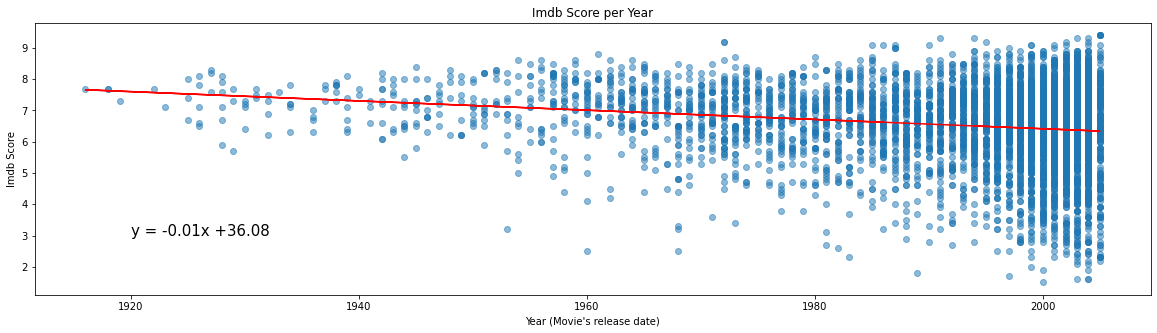

In [33]:
import scipy.stats as st

x_values = new_reduced["year"]
y_values = new_reduced["rating"]
plt.figure(figsize=(20, 5))
plt.scatter(x_values, y_values, alpha=0.5)


(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
#print(regress_values)
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

plt.xlabel("Year (Movie's release date)")
plt.ylabel('Imdb Score')
plt.title('Imdb Score per Year')

# Label plot and annotate the line equation
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(1920,3),fontsize=15,color="black")
# Print r value
print(f"The r-value is: {rvalue**2}")

plt.savefig("Rating per year2005.png")
plt.show()


In [30]:
# x = new_reduced["runtime"]
# y = new_reduced["rating"]
# plt.figure(figsize=(20, 5))
# plt.scatter(x, y, alpha=0.5)
# plt.xlabel('Runtime (min)')
# plt.ylabel('Rating')
# plt.title('Rating vs Time')
# plt.savefig("Rating vs Time.png")
# plt.show()

In [31]:
# # movie_length = new_reduced.loc[new_reduced["runtime"] > 200]
# # movie_length
# print(len(new_reduced))